# 1. Import required Libraries

In [1269]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from pandas.api.types import CategoricalDtype
from sklearn.feature_extraction.text import TfidfVectorizer

# 2. Import Data

In [1270]:
df = pd.read_csv("amazon_data_science_dataset.csv", delimiter = ",")
df

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,Deep Learning: Engage the World Change the World,"[ Michael Fullan, Joanne Quinn, et al.]",5.33,8.55 - 35.33,208,4.5,74,72%,14%,7%,2%,4%,7 x 0.47 x 10 inches,15.5 ounces,English,"Corwin; First edition (December 15, 2017)",59,/Deep-Learning-Engage-World-Change/dp/15063685...,https://www.amazon.com/Deep-Learning-Engage-Wo...
826,Machine Learning in Finance: From Theory to Pr...,"[ Matthew F. Dixon, Igor Halperin, et al.]",55.18,52.41 - 55.18,573,4.5,93,78%,7%,7%,4%,4%,6.14 x 1.25 x 9.21 inches,2.25 pounds,English,"Springer; 1st ed. 2020 edition (July 2, 2020)",,/Machine-Learning-Finance-Theory-Practice/dp/3...,https://www.amazon.com/Machine-Learning-Financ...
827,Practical Deep Learning at Scale with MLflow: ...,"[ Yong Liu, and , Dr. Matei Zaharia]",44.99,44.99,288,4.8,8,83%,17%,NaN,NaN,NaN,7.5 x 0.65 x 9.25 inches,1.1 pounds,English,"Packt Publishing (July 8, 2022)",978-1803241333,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
828,Clinical Biostatistics and Epidemiology Made R...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/Clinical-Biostatistics-Epidemiology-Ridiculou...,https://www.amazon.com/Clinical-Biostatistics-...


# 3. Describing the DataSet

In [1271]:
for col_idx, col_name in enumerate(df.columns):
    print(f"{str(col_idx).rjust(2)})  {col_name}")

 0)  title
 1)  author
 2)  price
 3)  price (including used books)
 4)  pages
 5)  avg_reviews
 6)  n_reviews
 7)  star5
 8)  star4
 9)  star3
10)  star2
11)  star1
12)  dimensions
13)  weight
14)  language
15)  publisher
16)  ISBN_13
17)  link
18)  complete_link


<br>
<br>

**Column Description**


**title**  =  title of the data science book<br>
**author**  =  list with author(s) of the book<br>
**price**  =  price of the data science book<br> 
**price (including used books)**  =  price range of the data science book including used books<br>
**pages**  =  number of pages of the book<br> 
**avg_reviews**  =  average review rating of the book <br>
**n_reviews**  =  number of reviews given to the book <br>
**star5**  =  percentage of reviews with 5 stars rating<br>
**star4**  =  percentage of reviews with 4 stars rating<br>
**star3**  =  percentage of reviews with 3 stars rating<br>
**star2**  =  percentage of reviews with 2 stars rating<br>
**star1**  =  percentage of reviews with 1 stars rating<br>
**dimensions**  =  book 3D fimensions in inches<br>
**weight**  =  book weight in pounds<br>
**language**  =  publishing language <br>
**publisher**  =  book publisher, edition nr and (publishing date)<br>
**ISBN_13**  =  International Standard Book Number with 13 digits<br>
**link**  =  short amazon book link<br>
**complete_link**  =  complete amazon book link<br>

<br>
<br>

In [1272]:
df.shape

(830, 19)

In [1273]:
df.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

In [1274]:
df.isna().any()

title                           False
author                           True
price                            True
price (including used books)     True
pages                            True
avg_reviews                      True
n_reviews                        True
star5                            True
star4                            True
star3                            True
star2                            True
star1                            True
dimensions                       True
weight                           True
language                         True
publisher                        True
ISBN_13                          True
link                            False
complete_link                   False
dtype: bool

In [1275]:
df.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                            object
avg_reviews                     float64
n_reviews                        object
star5                            object
star4                            object
star3                            object
star2                            object
star1                            object
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
dtype: object

# 4. Exploratory Data Analysis

In [1276]:
top_10_books = df.copy()
top_10_books = top_10_books.dropna(subset = ["avg_reviews", "n_reviews"], how = "any")

## 4.1. What are the TOP 10 books by Average Reviews?

In [1277]:
print("The amazon TOP10 Books by Average Reviews are:\n")
for title_idx, title in enumerate(top_10_books.sort_values(by = "avg_reviews", ascending = False)[["title", "avg_reviews"]].title.values[0:10]): 
    print(f"{str(title_idx + 1).rjust(2)})  {title}")

The amazon TOP10 Books by Average Reviews are:

 1)  Azure Data Engineering Cookbook: Get well versed in various data engineering techniques in Azure using this recipe-based guide, 2nd Edition
 2)  Practical Finite Element Simulations with SOLIDWORKS 2022: An illustrated guide to performing static analysis with SOLIDWORKS Simulation
 3)  Microsoft Office 365 For Beginners: The 1# Crash Course From Beginners To Advanced. Easy Way to Master The Whole Suite in no Time | Excel, Word, PowerPoint, OneNote, OneDrive, Outlook, Teams & Access
 4)  Python Mini Reference 2022: A Quick Guide to the Modern Python Programming Language for Busy Coders (A Hitchhiker's Guide to the Modern Programming Languages Book 3)
 5)  Python Cheat Sheet, Cover the Basic Python Syntaxes, A Reference Guide: Python Programming Synatx Book, Syntax Table & Chart, Quick Study Workbook (Syntax Series)
 6)  Time Series for Data Science: Analysis and Forecasting (Chapman & Hall/CRC Texts in Statistical Science)
 7)  Statis

## 4.2. What are the TOP 10 books by Average Weighted Score?

In [1278]:
top_10_books["n_reviews"] = top_10_books["n_reviews"].str.replace(pat = ",", repl = "").astype("int32")
top_10_books["avg_weighted_score"] = top_10_books["avg_reviews"] * top_10_books["n_reviews"]

print("The amazon TOP10 Books by Average Weighted Score are:\n")
for title_idx, title in enumerate(top_10_books.sort_values(by = "avg_weighted_score", ascending = False)[["title", "avg_reviews", "n_reviews", "avg_weighted_score"]].title.values[0:10]): 
    print(f"{str(title_idx + 1).rjust(2)})  {title}")

The amazon TOP10 Books by Average Weighted Score are:

 1)  Start with Why: How Great Leaders Inspire Everyone to Take Action
 2)  Monty Python and the Holy Grail (Special Edition)
 3)  Invisible Women: Data Bias in a World Designed for Men
 4)  Cracking the Coding Interview: 189 Programming Questions and Solutions
 5)  Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming
 6)  Tikaton Reptile Heat Pad - Adjustable Temperature Under Tank Heater for 10-20gal/30-40gal Tank, Terrarium Heat Mat for Turtle/Snake/Lizard/Frog/Spider/Plant Box
 7)  Principles for Dealing with the Changing World Order: Why Nations Succeed and Fail
 8)  REPTI ZOO Reptile Terrarium Thermometer Hygrometer Digital Display Pet Rearing Box Reptiles Tank Thermometer Hygrometer with Suction Cup
 9)  Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Programming for Advanced (Your place to learn Python with ease)

## 4.3. What are the TOP 10 Python Books by Average Weighted Score?

In [1279]:
print("The amazon TOP10 Python Books by Average Weighted Score are:\n")
for title_idx, title in enumerate(top_10_books.loc[top_10_books.title.str.contains("Python")].sort_values(by = "avg_weighted_score", ascending = False)[["title", "avg_reviews", "n_reviews", "avg_weighted_score"]].title.values[0:10]): 
    print(f"{str(title_idx + 1).rjust(2)})  {title}")

The amazon TOP10 Python Books by Average Weighted Score are:

 1)  Monty Python and the Holy Grail (Special Edition)
 2)  Python Crash Course, 2nd Edition: A Hands-On, Project-Based Introduction to Programming
 3)  Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Programming for Advanced (Your place to learn Python with ease)
 4)  Monty Python's Life Of Brian - The Immaculate Edition [Blu-ray]
 5)  Monty Python's Life Of Brian [DVD]
 6)  Monty Python's The Meaning of Life [Blu-ray]
 7)  Python: For Beginners: A Crash Course Guide To Learn Python in 1 Week
 8)  Automate the Boring Stuff with Python, 2nd Edition: Practical Programming for Total Beginners
 9)  Python for Everybody: Exploring Data in Python 3
10)  Learning Python: Powerful Object-Oriented Programming


## 4.4. What are the main languages of the Books in the Dataset?

In [1280]:
for i in df.language.unique(): 
    print(i)

English
nan
Spanish
Unqualified, Japanese (Dolby Digital 2.0 Mono), English (Dolby Digital 5.1), English (Dolby Digital 2.0 Mono)
you will discover all you need 
• How to make better business decisions using 
Concepts are presented in a "to-the-point" style to cater to the busy individual. With this book, you can learn Python in just one day and start coding immediately. 
standard library
This Python programming guide assumes certain level of programming knowledge. It is not a beginner textbook.
Scroll to the top of the page and click the 
English (Dolby Digital 2.0 Mono)
English (DTS-HD Master Audio 5.1), French (DTS-HD 2.0)
"Brilliant."


Considering the Laguages shown in the unique values, the ones that makes sense to focus on are: 

1) English
2) Spanish 

The other languages indicated aren't correctly provided by the seller and are thus to be cleaned and disregarded for this study.

In [1281]:
languages = ["English", "Spanish", "French"]

df_language = df.copy()
df_language = df_language.dropna(subset = "language")

for lang in languages:  
    df_language.loc[df_language.language.str.contains(lang), "language"] = lang

df_language = df_language.loc[df_language.language.isin(languages)][["title", "language"]]
df_language["language"].value_counts().to_frame().rename_axis("Language").rename(columns = {"language" : "Frequency"}).reset_index()

,Language,Frequency
0,English,748
1,Spanish,4


## 4.5. Nr. of Pages vs Price

In [1282]:
df_scatter = df.copy().dropna(subset = ["price", "pages", "n_reviews"], how = "any")[["title", "price", "pages", "n_reviews", 'avg_reviews']]
df_scatter["pages"] = df_scatter["pages"].apply(lambda x: x if x.isnumeric() else 0).astype("float")
df_scatter.n_reviews = df_scatter.n_reviews.str.replace(pat = ",", repl = "").astype("int32")

In [1283]:
df_scatter.corr(numeric_only = True)

,price,pages,n_reviews,avg_reviews
price,1.000000,0.430767,-0.118581,-0.024817
pages,0.430767,1.000000,0.076811,0.019844
n_reviews,-0.118581,0.076811,1.000000,0.078563
avg_reviews,-0.024817,0.019844,0.078563,1.000000


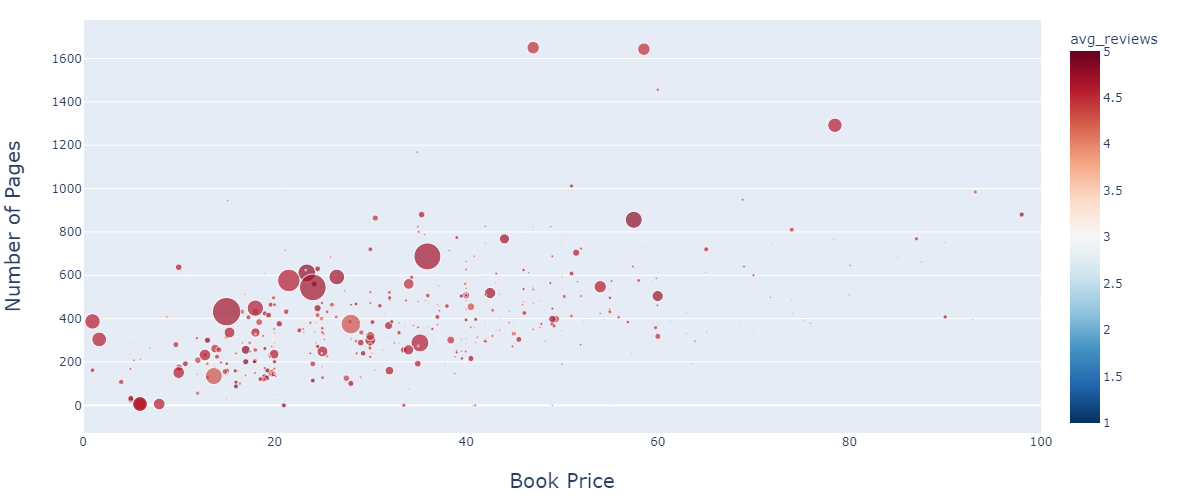

In [1284]:
fig = px.scatter(df_scatter, 
                 x="price", 
                 y="pages",
                 color='avg_reviews',
                 color_continuous_scale='RdBu_r',
                 size='n_reviews', 
                 width=800, 
                 height=500)

fig.update_layout(margin = dict(l=20, r=20, t=20, b=20),
                  paper_bgcolor = "white")

fig.update_xaxes(title_text = "Book Price",
                 title_font = {"size": 20},
                 title_standoff = 25,
                 showgrid = False,
                 tickangle = 0)
 
fig.update_yaxes(title_text = "Number of Pages",
                 title_font = {"size": 20},
                 title_standoff = 25)

fig.update_layout(xaxis_range=[0,100])
fig.show()

## 4.6. Book Volume vs Price

In [1285]:
def prod_list_elem(x):
    return np.product([float(i) for i in x])

df_vol_price = df.copy().dropna(subset = ["price", "dimensions"], how = "any")[["title", "dimensions", "price"]]
df_vol_price["volume"] = df_vol_price.dimensions.str.replace(" ", "").str.split(";").apply(lambda x: x[0]).str.replace("inches", "").str.split("x").apply(lambda x: prod_list_elem(x))
df_vol_price

,title,dimensions,price,volume
0,Data Analysis Using R (Low Priced Edition): A ...,8.5 x 1.01 x 11 inches,6.75,94.43500
1,Head First Data Analysis: A learner's guide to...,8 x 0.98 x 9.25 inches,33.72,72.52000
2,Guerrilla Data Analysis Using Microsoft Excel:...,8.25 x 0.6 x 10.75 inches,32.07,53.21250
3,Python for Data Analysis: Data Wrangling with ...,7 x 1.11 x 9.19 inches,53.99,71.40630
4,Excel Data Analysis For Dummies (For Dummies (...,7.38 x 0.83 x 9.25 inches,24.49,56.65995
...,...,...,...,...
822,ColorWise: A Data Storyteller's Guide to the I...,6 x 0.46 x 9 inches,29.99,24.84000
824,Data Science (The MIT Press Essential Knowledg...,5 x 0.57 x 6.9 inches,9.69,19.66500
825,Deep Learning: Engage the World Change the World,7 x 0.47 x 10 inches,5.33,32.90000
826,Machine Learning in Finance: From Theory to Pr...,6.14 x 1.25 x 9.21 inches,55.18,70.68675


In [1286]:
df_vol_price.isna().any()

title         False
dimensions    False
price         False
volume        False
dtype: bool

In [1287]:
df_vol_price.corr(numeric_only = True)

,price,volume
price,1.000000,0.474298
volume,0.474298,1.000000


Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.
Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated

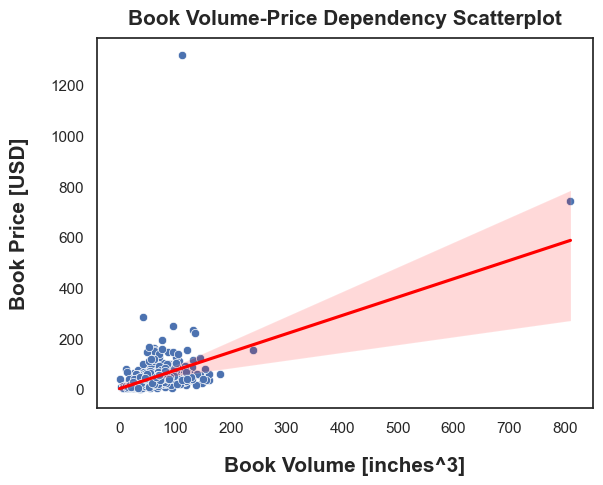

In [1288]:
sns.scatterplot(data = df_vol_price, 
                x = "volume", 
                y = "price")
sns.regplot(data = df_vol_price, 
            x = "volume", 
            y = "price", 
            scatter = False, 
            color = "red", 
            ci = 100)
plt.title("Book Volume-Price Dependency Scatterplot", fontsize = 15, fontweight = "bold", pad = 10)
plt.xlabel("Book Volume [inches^3]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Book Price [USD]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.show()

We can observe a book with the highest price as being an outlier. It is clear that this book is something special and its price value doesn't correlate with the its number of pages. Removing it from the study may increase the accuracy of the dependency investigation.

In [1289]:
# remove the book with the highest price
df_vol_price = df_vol_price.drop(index = df_vol_price.loc[df_vol_price.price == df_vol_price.price.max()].index[0]).reset_index(drop = True)
df_vol_price

,title,dimensions,price,volume
0,Data Analysis Using R (Low Priced Edition): A ...,8.5 x 1.01 x 11 inches,6.75,94.43500
1,Head First Data Analysis: A learner's guide to...,8 x 0.98 x 9.25 inches,33.72,72.52000
2,Guerrilla Data Analysis Using Microsoft Excel:...,8.25 x 0.6 x 10.75 inches,32.07,53.21250
3,Python for Data Analysis: Data Wrangling with ...,7 x 1.11 x 9.19 inches,53.99,71.40630
4,Excel Data Analysis For Dummies (For Dummies (...,7.38 x 0.83 x 9.25 inches,24.49,56.65995
...,...,...,...,...
633,ColorWise: A Data Storyteller's Guide to the I...,6 x 0.46 x 9 inches,29.99,24.84000
634,Data Science (The MIT Press Essential Knowledg...,5 x 0.57 x 6.9 inches,9.69,19.66500
635,Deep Learning: Engage the World Change the World,7 x 0.47 x 10 inches,5.33,32.90000
636,Machine Learning in Finance: From Theory to Pr...,6.14 x 1.25 x 9.21 inches,55.18,70.68675


In [1290]:
df_vol_price.corr(numeric_only = True)

,price,volume
price,1.000000,0.682508
volume,0.682508,1.000000


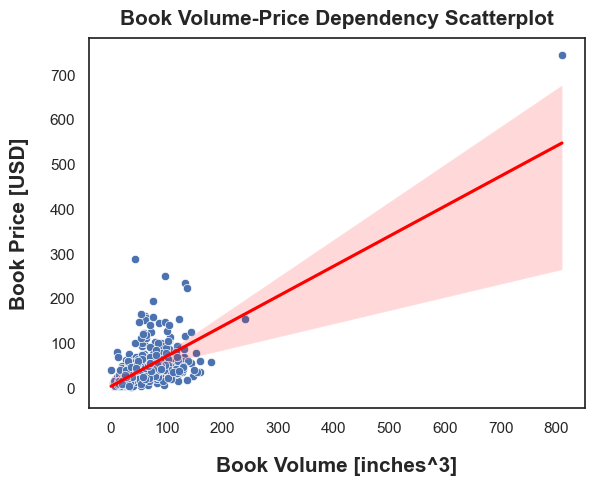

In [1291]:
sns.scatterplot(data = df_vol_price, 
                x = "volume", 
                y = "price")
sns.regplot(data = df_vol_price, 
            x = "volume", 
            y = "price", 
            scatter = False, 
            color = "red", 
            ci = 100)
plt.title("Book Volume-Price Dependency Scatterplot", fontsize = 15, fontweight = "bold", pad = 10)
plt.xlabel("Book Volume [inches^3]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Book Price [USD]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.show()

The value of the correlation coefficient increased to 0.68, which indicates a moderate correlation of the x and y variables.

## 4.7. AVG Reviews vs Price

In [1292]:
df_avg_rev_price = df.copy().dropna(subset = ["price", "avg_reviews"], how = "any")[["title", "avg_reviews", "price"]]
df_avg_rev_price

,title,avg_reviews,price
0,Data Analysis Using R (Low Priced Edition): A ...,4.4,6.75
1,Head First Data Analysis: A learner's guide to...,4.3,33.72
2,Guerrilla Data Analysis Using Microsoft Excel:...,4.7,32.07
3,Python for Data Analysis: Data Wrangling with ...,4.6,53.99
4,Excel Data Analysis For Dummies (For Dummies (...,3.9,24.49
...,...,...,...
824,Data Science (The MIT Press Essential Knowledg...,4.5,9.69
825,Deep Learning: Engage the World Change the World,4.5,5.33
826,Machine Learning in Finance: From Theory to Pr...,4.5,55.18
827,Practical Deep Learning at Scale with MLflow: ...,4.8,44.99


In [1293]:
df_avg_rev_price.dtypes

title           object
avg_reviews    float64
price          float64
dtype: object

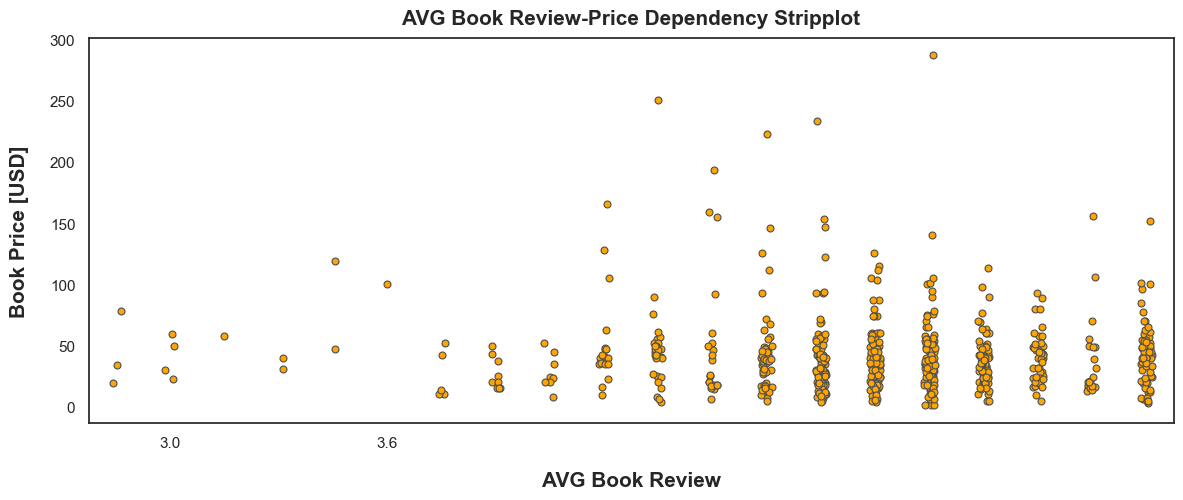

In [1294]:
sns.set_theme(style="white")
plt.figure(figsize=(14, 5))
sns.stripplot(data = df_avg_rev_price, 
              x = "avg_reviews", 
              y = "price",
              jitter = .1, 
              linewidth = .8,
              color = "orange")
plt.title("AVG Book Review-Price Dependency Stripplot", fontsize = 15, fontweight = "bold", pad = 10)
plt.xlabel("AVG Book Review", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Book Price [USD]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.xticks([1.0, 5.0])
plt.show()

In [1295]:
df_avg_rev_price.avg_reviews

0      4.4
1      4.3
2      4.7
3      4.6
4      3.9
      ... 
824    4.5
825    4.5
826    4.5
827    4.8
829    4.7
Name: avg_reviews, Length: 637, dtype: float64

Let's create 5 common ranges for the AVG Reviews and try to plot them in the same way again. The AVG Review classes are: 
[1-2)
[2-3)
[3.4)
[4-5)

In [1296]:
def ininterval(x):    
    if x in pd.Interval(left=1.0, right=1.5, closed = "left"):
        return "1.0-1.5"
    if x in pd.Interval(left=1.5, right=2.0, closed = "left"):
        return "1.5-2.0"
    if x in pd.Interval(left=2.0, right=2.5, closed = "left"):
        return "2.0-2.5"
    if x in pd.Interval(left=2.5, right=3.0, closed = "left"):
        return "2.5-3.0"
    if x in pd.Interval(left=3.0, right=3.5, closed = "left"):
        return "3.0-3.5"
    if x in pd.Interval(left=3.5, right=4.0, closed = "left"):
        return "3.5-4.0"
    if x in pd.Interval(left=4.0, right=4.5, closed = "left"):
        return "4.0-4.5"
    else:
        return "4.5-5.0"
                                    
df_avg_rev_price["avg_reviews_bins"] = df_avg_rev_price.avg_reviews.apply(lambda x: ininterval(x))                                
df_avg_rev_price


categorical_type = CategoricalDtype(categories=["1.0-1.5", "1.5-2.0", "2.0-2.5", "2.5-3.0", "3.0-3.5", "3.5-4.0", "4.0-4.5", "4.5-5.0"], ordered=True)

df_avg_rev_price["avg_reviews_bins"] = df_avg_rev_price["avg_reviews_bins"].astype(categorical_type)
df_avg_rev_price

,title,avg_reviews,price,avg_reviews_bins
0,Data Analysis Using R (Low Priced Edition): A ...,4.4,6.75,4.0-4.5
1,Head First Data Analysis: A learner's guide to...,4.3,33.72,4.0-4.5
2,Guerrilla Data Analysis Using Microsoft Excel:...,4.7,32.07,4.5-5.0
3,Python for Data Analysis: Data Wrangling with ...,4.6,53.99,4.5-5.0
4,Excel Data Analysis For Dummies (For Dummies (...,3.9,24.49,3.5-4.0
...,...,...,...,...
824,Data Science (The MIT Press Essential Knowledg...,4.5,9.69,4.5-5.0
825,Deep Learning: Engage the World Change the World,4.5,5.33,4.5-5.0
826,Machine Learning in Finance: From Theory to Pr...,4.5,55.18,4.5-5.0
827,Practical Deep Learning at Scale with MLflow: ...,4.8,44.99,4.5-5.0


In [1297]:
df_avg_rev_price

,title,avg_reviews,price,avg_reviews_bins
0,Data Analysis Using R (Low Priced Edition): A ...,4.4,6.75,4.0-4.5
1,Head First Data Analysis: A learner's guide to...,4.3,33.72,4.0-4.5
2,Guerrilla Data Analysis Using Microsoft Excel:...,4.7,32.07,4.5-5.0
3,Python for Data Analysis: Data Wrangling with ...,4.6,53.99,4.5-5.0
4,Excel Data Analysis For Dummies (For Dummies (...,3.9,24.49,3.5-4.0
...,...,...,...,...
824,Data Science (The MIT Press Essential Knowledg...,4.5,9.69,4.5-5.0
825,Deep Learning: Engage the World Change the World,4.5,5.33,4.5-5.0
826,Machine Learning in Finance: From Theory to Pr...,4.5,55.18,4.5-5.0
827,Practical Deep Learning at Scale with MLflow: ...,4.8,44.99,4.5-5.0


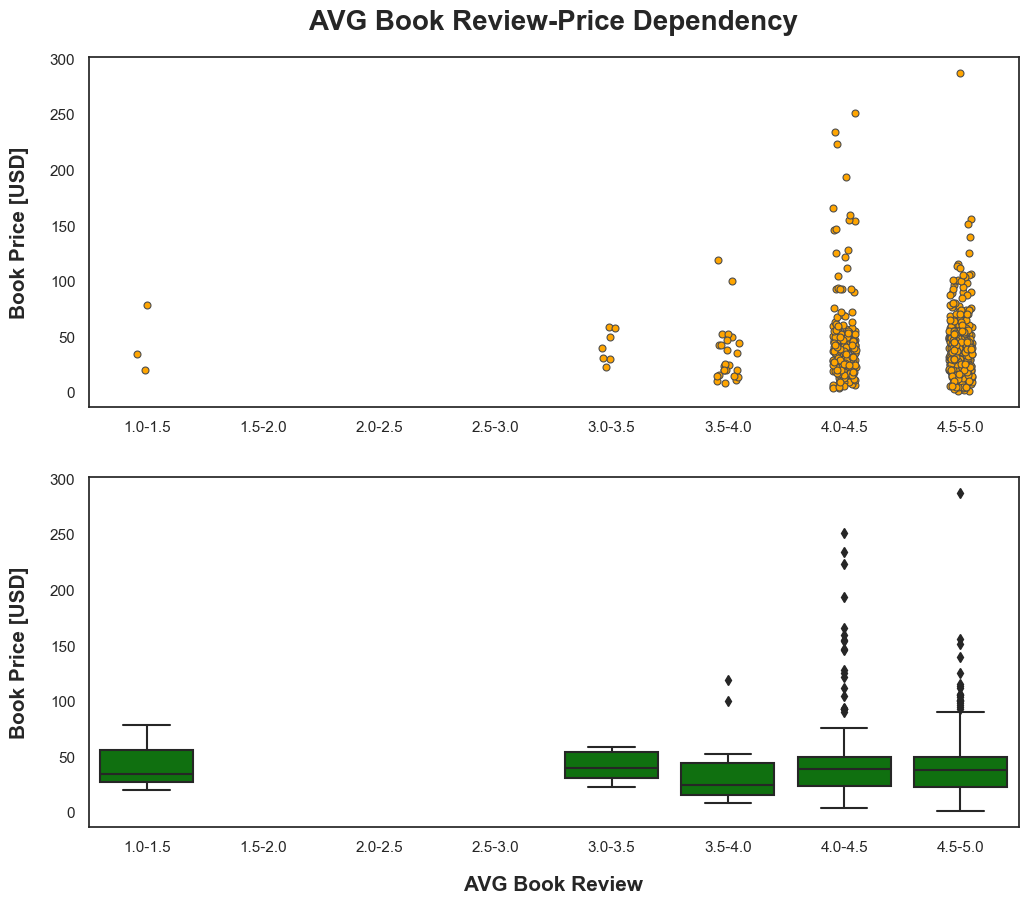

In [1298]:
sns.set_theme(style="white")
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.stripplot(data = df_avg_rev_price, 
              x = "avg_reviews_bins", 
              y = "price",
              jitter = .1, 
              linewidth = .8,
              color = "orange")
plt.title("AVG Book Review-Price Dependency", fontsize = 20, fontweight = "bold", pad = 20)
plt.xlabel("", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Book Price [USD]", fontsize = 15, fontweight = "bold", labelpad = 15)

plt.subplot(2, 1, 2)
sns.boxplot(data = df_avg_rev_price, 
              x = "avg_reviews_bins", 
              y = "price",
              color = "green")
plt.title("", fontsize = 18, fontweight = "bold", pad = 10)
plt.xlabel("AVG Book Review", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.ylabel("Book Price [USD]", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.show()

Conclusion: quality is not always expensive. Although there are some outliers for the books with AVG reviews in the bins 4.0-4.5 and 4.5-5.0, the price distribution of all books is quite similar with the mean oscilating around price of 50 USD per piece.

## 4.8. Data Science Book Tools or Programming Languages Overview

Let us investigate the most popular tools or programming languages among our books. For that, we will focus on the following ones: 

1) Python
2) R
3) SQL
4) Excel 
5) Tableau
6) Power BI

In [1299]:
searched_tools = ["Python", "R", "SQL", "Excel", "Tableau", "Power BI"]

df_by_tool = df.copy() 

for tool in searched_tools:
    df_by_tool.loc[df_by_tool.title.str.contains(tool), "tool"] = tool

df_by_tool["tool"] = df_by_tool["tool"].fillna(value = "Other")
df_by_tool.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,tool
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...,R
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...,Other
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...,Excel
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...,Python
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...,Excel


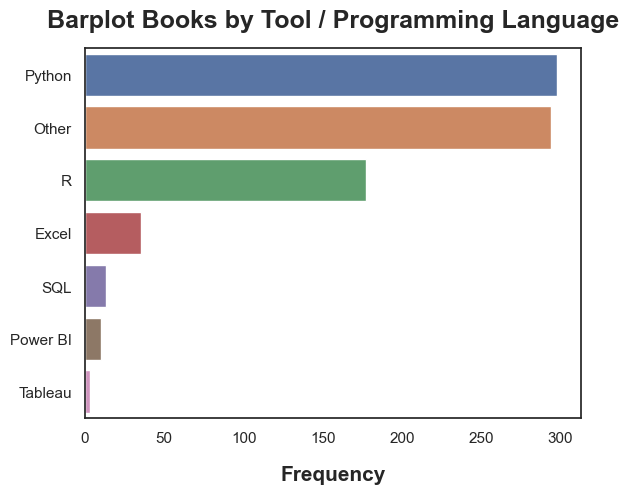

In [1300]:
sns.barplot(df_by_tool.tool.value_counts().to_frame().rename_axis("Tool").rename(columns = {"tool" : "Frequency"}).reset_index(),
            y = "Tool",
            x = "Frequency",
            orient = "h")
plt.title("Barplot Books by Tool / Programming Language", fontsize = 18, fontweight = "bold", pad = 15)
plt.ylabel("")
plt.xlabel("Frequency", fontsize = 15, fontweight = "bold", labelpad = 15)
plt.show()

## 4.9. Most used Words (KMeans Algorithm Clustering)

In [1301]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [1302]:
vectorizer = TfidfVectorizer(stop_words='english', 
                             ngram_range=(1,2))
X = vectorizer.fit_transform(df["title"])

In [1303]:
# Create clusters using KMeans Algorithm 
nr_of_clusters = 4
model = KMeans(n_clusters = nr_of_clusters, 
               init = 'k-means++', 
               max_iter = 500, 
               n_init = 10)
model.fit(X)
# Get prediction/ labels from the model fit
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)), 
                       columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']).reset_index(drop = True))

                                                 title  cluster
0    Learn Python 3 the Hard Way: A Very Simple Int...        0
1    Introduction to Python Programming for Busines...        0
2    A Student's Guide to Python for Physical Model...        0
3    Python for Biologists: A complete programming ...        0
4    The Python Bible Volume 5: Python For Finance ...        0
..                                                 ...      ...
825  R for Data Analysis in easy steps - R Programm...        3
826  Learning Tableau 2022: Create effective data v...        3
827  The Statistical Sleuth: A Course in Methods of...        3
828              Python Data Analysis - Second Edition        3
829  Data Analysis Using R (Low Priced Edition): A ...        3

[830 rows x 2 columns]


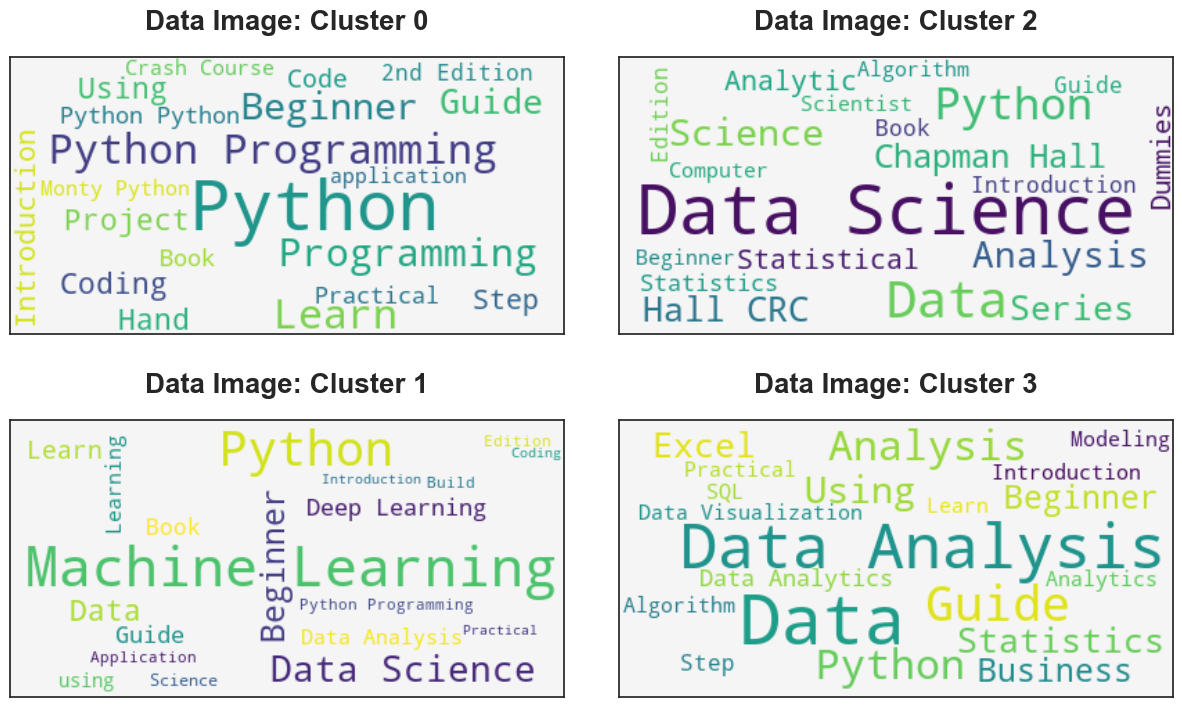

In [1304]:
cols = [0, 1]
rows = [0, 1]
cluster_idx = -1

fig, ax = plt.subplots(2, 2, figsize=(15, 9))
fig.subplots_adjust(wspace = 0.1, hspace = 0.1)

for col in cols: 
    for row in rows:      
        cluster_idx += 1
        text = book_cl[book_cl.cluster == cluster_idx]['title'].str.cat(sep=' ')
        wordcloud = WordCloud(max_font_size = 50, 
                              max_words = 20, 
                              background_color = "#F5F5F5").generate(text)
        ax[row, col].imshow(wordcloud, 
                            interpolation = "bilinear")
        ax[row, col].set_title("Data Image: Cluster " + str(cluster_idx), fontsize = 20, fontweight = "bold", pad = 20) 
        ax[row, col].plot(palette = "twilight")
        ax[row, col].set_facecolor("lightgreen")
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
plt.show()